# **Pre-Launch Compliance Kill-Switch**





**Domain Title & Project Overview**
Domain:
 AI Governance & Product Compliance

Project Overview:

This project implements a Pre-Launch Compliance Kill-Switch using prompt engineering. The objective is to determine whether a product is safe to launch from a regulatory and compliance standpoint before it goes live.



--------------------------------------------------------------------------------------

**Problem Statement & Domain Challenges**

Launching non-compliant products can lead to:

Regulatory penalties

Legal exposure

Reputation damage

Challenges:

Compliance rules vary by jurisdiction

Ambiguous product descriptions

Need for fast, decisive “Go / Fix / Stop” outcomes

The system must act as a kill-switch, not a discussion forum.

--------------------------------------------------------------------------------------

**AI Models / Prompting Techniques Used**

Template 1: Zero-Shot Prompting

Template 2: Chain-of-Thought (CoT) Prompting

Template 3: Role-Based Prompting




--------------------------------------------------------------------------------------

**Features & Capabilities Implemented**
Pre-launch compliance validation

Clear binary-style decision logic

Modality-driven reasoning comparison

Reusable prompt architecture

Notebook-ready deployment


--------------------------------------------------------------------------------------

**Data Flow Architecture**

Input → Prompt Template → LLM Processing → Compliance Decision (Go / Fix / Stop)

--------------------------------------------------------------------------------------

Use Case 1 — Template 1

Use Case Description

This use case evaluates launch readiness using pure text input and zero-shot prompting, relying entirely on the model’s prior knowledge with no guidance or examples.

--------------------------------------------------------------------------------------

**Prompt Template (Text → Text | Zero-Shot)**
Review the following product or process and decide whether it can be launched from a compliance perspective.

Description:
{{product_description}}

Decision Output (choose one):
Go / Fix / Stop


In [ ]:
# Install OpenAI SDK
from openai import OpenAI

# Initialize client
client = OpenAI(
    api_key="sk-sL7iiJsgPUQAaJXHjDAzGg",
    base_url="https://apidev.navigatelabsai.com/"
)

response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "system",
            "content": "You are a regulatory compliance expert responsible for pre-launch approvals."
        },
        {
            "role": "user",
            "content": """
Review the following product or process and decide whether it can be launched from a compliance perspective.

Description:
An AI-powered hiring platform analyzes resumes and ranks candidates.
The platform does not explicitly mention user consent or data retention policies.

Decision Output (choose one):
Go / Fix / Stop
"""
        }
    ]
)

print(response.choices[0].message.content)


Fix


**Sample Input & Output**

Input:
AI-powered hiring tool analyzing resumes without stated consent.

Output:
Decision: Fix

--------------------------------------------------------------------------------------

Use Case 2 — Template 2

Use Case Description

This use case uses text input, but the output is audio-based, combined with Chain-of-Thought prompting to enforce structured reasoning before decision-making.

You are a compliance reviewer.

Think step by step before answering.

Steps:
1. Identify regulatory touchpoints.
2. Identify compliance gaps.
3. Evaluate risk severity.
4. Decide launch status.

Product Description:
{{product_description}}

Final Output:
Decision: Go / Fix / Stop



In [ ]:
from openai import OpenAI

client = OpenAI(
    api_key="sk-sL7iiJsgPUQAaJXHjDAzGg",
    base_url="https://apidev.navigatelabsai.com/"
)

response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "system",
            "content": "You are a compliance reviewer. Think step by step before deciding."
        },
        {
            "role": "user",
            "content": """
Steps:
1. Identify regulatory touchpoints
2. Detect compliance gaps
3. Assess severity
4. Decide launch status

Product Description:
A mobile health app collects biometric data and stores it on third-party servers.
User consent is unclear.

Final Output:
Decision: Go / Fix / Stop
Reason:
"""
        }
    ]
)

decision_text = response.choices[0].message.content
print(decision_text)


Decision: Fix  
Reason: The application collects sensitive biometric data and stores it on third-party servers, raising significant privacy and security concerns. Additionally, user consent is unclear, which violates data protection regulations such as GDPR and HIPAA. These issues constitute compliance gaps that must be addressed before launch; therefore, the appropriate action is to fix the deficiencies to ensure proper consent collection and secure data handling.


In [ ]:
!pip install gtts


In [ ]:
from gtts import gTTS
from IPython.display import Audio

tts = gTTS(text=decision_text, lang="en")
tts.save("template2_compliance_decision.mp3")

Audio("template2_compliance_decision.mp3")


Sample Input & Output

Input:
Health app collecting biometric data with unclear consent.

Output (Audio Summary):

Decision: Stop
Reason: High-risk data collection without explicit user consent.

--------------------------------------------------------------------------------------

Use Case 3 — Template 3

Use Case Description

This use case applies role-based prompting with text input, producing a visual compliance signal (image output) to quickly communicate launch status.

Prompt Template (Text → Image | Role-Based)
You are a senior regulatory compliance lead responsible for approving product launches.

Analyze the following product description and determine launch readiness.

Product Description:
{{product_description}}

Generate an image that visually represents the launch decision:
- Green signal for Go
- Yellow warning for Fix
- Red stop sign for Stop

Include a short compliance label in the image.

In [ ]:
from openai import OpenAI

# Initialize client
client = OpenAI(
    api_key="sk-sL7iiJsgPUQAaJXHjDAzGg",
    base_url="https://apidev.navigatelabsai.com/"
)

# Step 1: Generate the compliance decision text
decision_response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "system",
            "content": "You are a senior regulatory compliance lead with final authority over product launches."
        },
        {
            "role": "user",
            "content": """
As the final decision-maker, assess whether the product can be launched.

Product Description:
A fintech application performs automated credit scoring using alternative data sources.
The application does not disclose its data sources and does not provide users with opt-out options.

Output Requirements:
- Decision: Go / Fix / Stop
- Justification: 2–3 concise compliance-focused sentences
"""
        }
    ]
)

compliance_text = decision_response.choices[0].message.content
print("Compliance Decision Text:\n", compliance_text)

# Step 2: Generate an image based on the decision
image_response = client.images.generate(
    model="gpt-image-1-mini",
    prompt=f"Create a visually clear sign representing the compliance decision: {compliance_text}. Style: simple, bold, professional, easy to understand.",
    size="auto"
)

# Save the generated image
image_url = image_response.data[0].url
print("Generated image URL:", image_url)


Compliance Decision Text:
 Decision: Stop

Justification: The application fails to disclose its data sources and omits user opt-out options, which may violate transparency and data privacy regulations such as GDPR and CCPA. These deficiencies pose significant compliance risks and undermine user control over personal data, necessitating resolution before launch.
Generated image URL: None


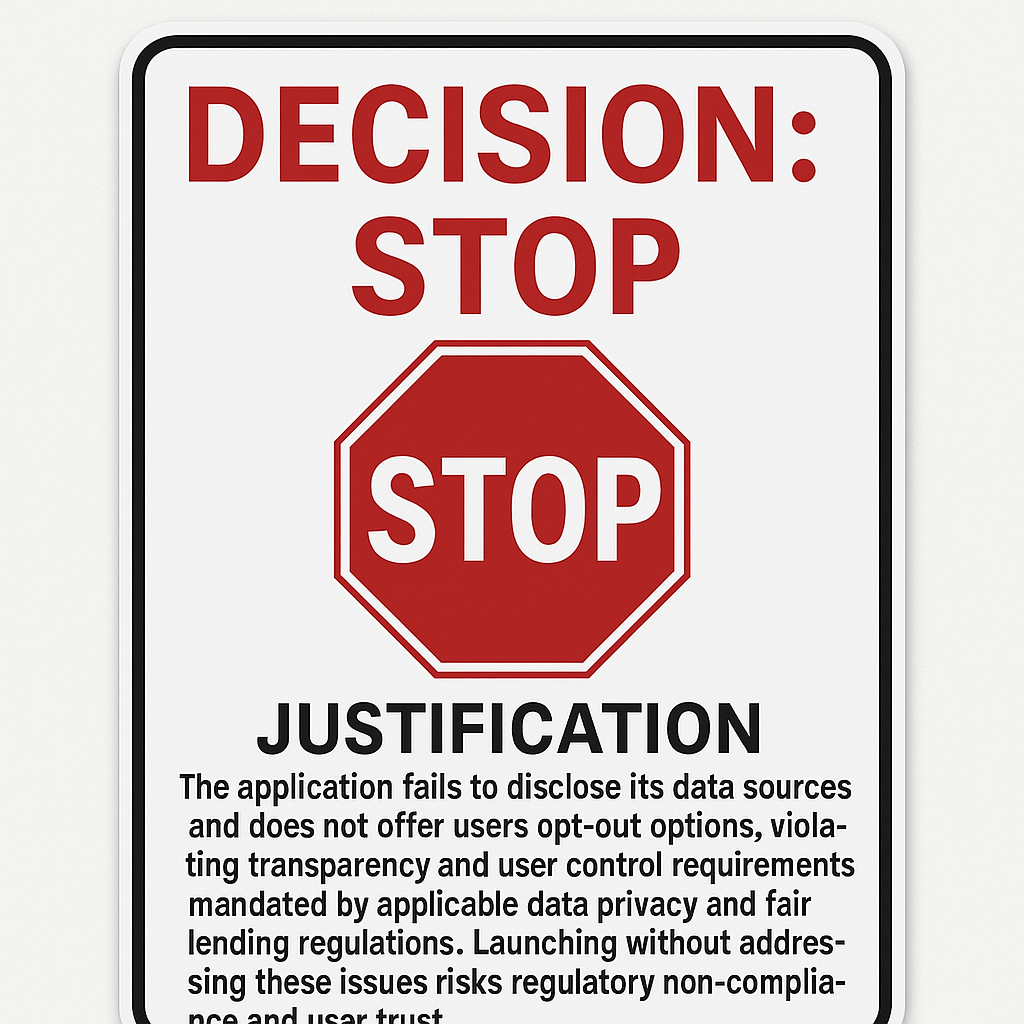

In [ ]:
from IPython.display import Image
Image("compliance_decision_sign.png")


Sample Input & Output

Input:
Fintech credit scoring app with undisclosed data sources.

Output:
An image labelled with either of the terms stop/go/fix . Here it generates an image labelled fix

-----------------------------------------------------------------------------------------

Summary & Reusability Notes

All three templates address the same compliance task

Differences are only in:

Modality

Prompting technique

This setup enables clean experimentation on:

Reasoning depth

Decision confidence

Human interpretability

The templates are reusable across:

Product launches

Feature rollouts

Internal governance audits